In [1]:
import pandas as pd
import numpy as np

### 이상치

In [29]:
mpg = pd.read_csv('mpg.csv')

In [3]:
import seaborn as sns

In [5]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


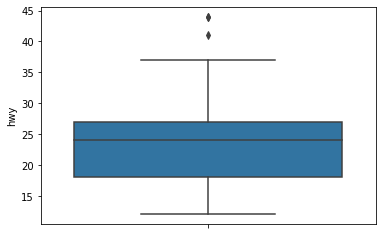

In [6]:
hwy_box = sns.boxplot(data=mpg, y='hwy')

- 위아래 가로선은 각각 최대값, 최소값
- 상자의 아랫선은 제1사분위수, 상자 내 가로선은 제2사분위수, 윗선은 제3사분위수
- 상자 밖 점은 이상치 (1.5IQR을 벗어난 값)

### 제1사분위수, 제3사분위수
- quantile()로 원하는 분위수를 구할 수 있음

In [8]:
qut25 = mpg['hwy'].quantile(.25)
print(qut25)

18.0


In [9]:
qut75 = mpg['hwy'].quantile(.75)
print(qut75)

27.0


- IQR은 1사분위수와 3사분위수 사이의 거리

In [10]:
iqr = qut75-qut25
print(iqr)

9.0


### 상한, 하한 구하기
- 박스플롯의 최대값, 최소값이 되는 값
- 하한: 1사분위수보다 IQR의 1.5배만큼 더 작은 값
- 상한: 3사분위수보다 IQR의 1.5배만큼 더 큰 값

In [12]:
max = qut75 + iqr*1.5
print(max)

40.5


In [13]:
min = qut25 - iqr*1.5
print(min)

4.5


### 극단치 결측 처리하기

In [40]:
mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5), np.nan, mpg['hwy'])
#hwy값이 하한보다 작거나, 상한보다 큰 값은 np.nan으로 대치하고, 아닐 경우 그대로

In [41]:
mpg['hwy'][mpg['hwy'].isnull()]
# 결측치인 행 인덱스 찾기

212   NaN
221   NaN
222   NaN
Name: hwy, dtype: float64

In [42]:
mpg['hwy'].isna().sum()

3

In [49]:
mpg.groupby('drv').agg(mean_hwy=('hwy', 'mean'))
# 결측치 제거하지 않고

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [50]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))
# 결측치 제거하고
# 왜 결과가 똑같지

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [45]:
mpg['hwy'][[212, 221, 222]]

212   NaN
221   NaN
222   NaN
Name: hwy, dtype: float64

### 데이터 추출하기

In [46]:
mpg['model']
# 컬럼을 기준으로 추출

0          a4
1          a4
2          a4
3          a4
4          a4
        ...  
229    passat
230    passat
231    passat
232    passat
233    passat
Name: model, Length: 234, dtype: object

In [48]:
mpg[['model', 'hwy']]
# 두개 이상의 컬럼일 경우 데이터프레임 형태로 반환

,model,hwy
0,a4,29.0
1,a4,29.0
2,a4,31.0
3,a4,30.0
4,a4,26.0
...,...,...
229,passat,28.0
230,passat,29.0
231,passat,26.0
232,passat,26.0


### 행 단위로 데이터 추출
- loc: 인덱스 기준으로
- iloc: 행 번호를 기준으로 
- 인덱스는 내가 설정한대로, 행 번호는 순서대로라고 생각하면 될 듯

In [60]:
mpg_rows = mpg.shape[0]
# axis=0의 형태

In [61]:
mpg_rows

234

In [62]:
mpg_rows_1 = mpg_rows - 1
mpg_rows_1

233

In [64]:
mpg.loc[mpg_rows_1]

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [65]:
mpg.loc[[0, 4, 233, 12, 41]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26.0,p,midsize
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25.0,p,compact
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24.0,r,minivan


In [66]:
y = range(10)

In [68]:
mpg.iloc[y]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28.0,p,compact


In [69]:
mpg.loc[y]
# 지금은 인덱스랑 행번호가 같음

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28.0,p,compact


In [70]:
mpg_new = mpg.loc[[0, 2, 4, 6, 8]]

In [71]:
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact


In [72]:
mpg_new.loc[2]
# 위에서 두번째 행 (인덱스로 2)이 추출됨

manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                   31.0
fl                       p
category           compact
Name: 2, dtype: object

In [73]:
mpg_new.iloc[2]
# 위에서 세번째 행 (행번호로 2, 인덱스로 4)이 추출됨

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                   16
hwy                 26.0
fl                     p
category         compact
Name: 4, dtype: object

In [74]:
mpg.loc[:, ['model', 'drv']]
# 행 인덱스 먼저 적고 컬럼

,model,drv
0,a4,f
1,a4,f
2,a4,f
3,a4,f
4,a4,f
...,...,...
229,passat,f
230,passat,f
231,passat,f
232,passat,f


In [75]:
mpg.loc[1:30, ['model', 'drv']]

,model,drv
1,a4,f
2,a4,f
3,a4,f
4,a4,f
5,a4,f
6,a4,f
7,a4 quattro,4
8,a4 quattro,4
9,a4 quattro,4
10,a4 quattro,4


### loc과 iloc의 차이점

In [76]:
mpg.loc[0:5, [1, 2, 3]]
#loc은 컬럼 인덱스로는 추출 불가

KeyError: "None of [Int64Index([1, 2, 3], dtype='int64')] are in the [columns]"

In [77]:
mpg.iloc[0:5, [1,2,3]]
# iloc은 가능

,model,displ,year
0,a4,1.8,1999
1,a4,1.8,1999
2,a4,2.0,2008
3,a4,2.0,2008
4,a4,2.8,1999


In [79]:
tmp = list(range(0,10,2))

In [80]:
mpg.iloc[:, tmp]

,manufacturer,displ,cyl,drv,hwy
0,audi,1.8,4,f,29.0
1,audi,1.8,4,f,29.0
2,audi,2.0,4,f,31.0
3,audi,2.0,4,f,30.0
4,audi,2.8,6,f,26.0
...,...,...,...,...,...
229,volkswagen,2.0,4,f,28.0
230,volkswagen,2.0,4,f,29.0
231,volkswagen,2.8,6,f,26.0
232,volkswagen,2.8,6,f,26.0


In [81]:
mpg.iloc[0:5, 0:8:2]
# range와 똑같이 0부터 7까지 2씩 증가

,manufacturer,displ,cyl,drv
0,audi,1.8,4,f
1,audi,1.8,4,f
2,audi,2.0,4,f
3,audi,2.0,4,f
4,audi,2.8,6,f
